# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
#загружаем данные
import pandas as pd
data = pd.read_csv('orange_small_churn_data.train', delimiter =',')
data['labels'] = pd.read_csv('orange_small_churn_labels.train', header=None)
#конвертируем колонку labels в int
data = data.astype({'labels': 'int32'})
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,labels
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


2\. Рассчитайте доли классов `отток` и `не отток`.

In [2]:
#доля оттока
print(sum(data['labels'] == 1)/data.shape[0])
#не оттока
print(sum(data['labels'] == -1)/data.shape[0])

0.0744
0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [3]:
#для непрерывных переменных рассчитаем разность математических ожиданий, как описано в лекциях, 
#для категориальных - коэффициент Краммера
#Если значение признака - Nan, - пропускаем значение при рассчете корреляции
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,labels
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [4]:
#посмотрим долю значений NaN в каждом признаке, видим, что во многих признаках все или почти все значения NaN
NaN_frac = data.isna().sum(axis = 0)/data.shape[0]
NaN_frac

Var1      0.985750
Var2      0.974850
Var3      0.974875
Var4      0.968125
Var5      0.970875
Var6      0.110875
Var7      0.111000
Var8      1.000000
Var9      0.985750
Var10     0.970875
Var11     0.974875
Var12     0.988400
Var13     0.111000
Var14     0.974875
Var15     1.000000
Var16     0.970875
Var17     0.968125
Var18     0.968125
Var19     0.968125
Var20     1.000000
Var21     0.110875
Var22     0.100400
Var23     0.970875
Var24     0.145400
Var25     0.100400
Var26     0.970875
Var27     0.970875
Var28     0.100425
Var29     0.985750
Var30     0.985750
            ...   
Var202    0.000025
Var203    0.003075
Var204    0.000000
Var205    0.038675
Var206    0.110875
Var207    0.000000
Var208    0.003075
Var209    1.000000
Var210    0.000000
Var211    0.000000
Var212    0.000000
Var213    0.977750
Var214    0.509150
Var215    0.985925
Var216    0.000000
Var217    0.014000
Var218    0.014000
Var219    0.104900
Var220    0.000000
Var221    0.000000
Var222    0.000000
Var223    0.

In [5]:
numericalVarCount = 190
categorialVarCount = 40
#cчитаем меру взаимосвязи для числовых признаков
#чтобы можно было сравнивать меры для каждой пары, перед рассчетом стандартизируем вещественный признак
numCorrs = {}
thresh = 0.99
for col in data.columns[0:numericalVarCount]:
    #если доля NaN больше порога, не считать коэффициент
    if NaN_frac[col] > 0.99:
        continue
    currentCols = data.loc[:,[col,'labels']].dropna()
    #стандартизируем
    meanVal = currentCols[col].mean()
    std = currentCols[col].std()
    currentCols[col] = (currentCols[col] - meanVal)/ std
    idx = (data['labels'] == 1)
    e1 = sum(currentCols.loc[idx,col]) / sum(idx)
    idx = (data['labels'] == -1)
    e2 = sum(currentCols.loc[idx,col]) / sum(idx)
    numCorrs[col] = e1 - e2;
numCorrs

{'Var1': 0.000569972283291329,
 'Var10': 0.002105396880580218,
 'Var100': -0.0021241181808196053,
 'Var101': -0.0008968304708383739,
 'Var103': -0.0008374406820485502,
 'Var104': 3.921847310920401e-05,
 'Var105': 3.921847310920104e-05,
 'Var106': -0.0010708070051423937,
 'Var107': -0.000835167286383366,
 'Var108': -0.0011777337775239851,
 'Var109': -0.01767160247200318,
 'Var11': -0.002084969407871765,
 'Var110': -0.002511401968755583,
 'Var111': 0.005209428145899347,
 'Var112': -0.019745284302839276,
 'Var113': 0.21382878872974273,
 'Var114': 0.0036965447739684895,
 'Var115': -0.002144321514773701,
 'Var116': 0.0003288902552678193,
 'Var117': -0.0004914293397429039,
 'Var119': -0.039767796606588565,
 'Var12': 0.0016950305393335636,
 'Var120': -0.0018269838363716942,
 'Var121': -0.00014656356820576092,
 'Var122': -0.0017815096041891706,
 'Var123': -0.00040240924754676304,
 'Var124': -0.003089052281149926,
 'Var125': -0.05255867012462694,
 'Var126': 0.13632500927238161,
 'Var127': -0.00

In [6]:
#считаем меру взаимосвязи категориальных признаков
import scipy.stats as ss
import numpy as np
catCorrs = {}
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
for col in data.columns[numericalVarCount:-1]:
    #если слишком много значений NaN, не считаем коэффициент
    if NaN_frac[col] > 0.9:
        continue
    currentCols = data.loc[:,[col,'labels']].dropna()
    confusion_matrix = pd.crosstab(currentCols[col], currentCols['labels'])
    catCorrs[col] = cramers_corrected_stat(confusion_matrix)
catCorrs

{'Var192': 0.11626417362941791,
 'Var193': 0.060860727354515358,
 'Var194': 0.0098440011116377301,
 'Var195': 0.021285430770081496,
 'Var196': 0.0086427801239886831,
 'Var197': 0.034824207534254567,
 'Var198': 0.0,
 'Var199': 0.23737498836065524,
 'Var200': 0.042818116236723297,
 'Var201': 0.0,
 'Var202': 0.0,
 'Var203': 0.0071531056119268624,
 'Var204': 0.047845703824949189,
 'Var205': 0.073483745187562954,
 'Var206': 0.077436116936185351,
 'Var207': 0.055417639344489185,
 'Var208': 0.0078653129680218183,
 'Var210': 0.047235434072584792,
 'Var211': 0.031538600605877841,
 'Var212': 0.075150487005991681,
 'Var214': 0.042818116236723297,
 'Var216': 0.083442059065277796,
 'Var217': 0.0,
 'Var218': 0.0444252120103487,
 'Var219': 0.011210372107811881,
 'Var220': 0.0,
 'Var221': 0.047567968268739859,
 'Var222': 0.0,
 'Var223': 0.0059964832992737954,
 'Var225': 0.030928260817946269,
 'Var226': 0.04247117929509199,
 'Var227': 0.054254885093536605,
 'Var228': 0.070616969869521221,
 'Var229': 0.

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [7]:
#получим список числовых переменных, отсортированный по абсолютному значению коэффициента корреляции с целевой переменной
import operator
sorted_numCorrs = sorted(numCorrs, key=lambda dict_key: abs(numCorrs[dict_key]), reverse=True)
topNumCorrs20 = sorted_numCorrs[0:20]
topNumCorrs20

['Var73',
 'Var7',
 'Var113',
 'Var189',
 'Var144',
 'Var13',
 'Var65',
 'Var126',
 'Var81',
 'Var74',
 'Var140',
 'Var72',
 'Var6',
 'Var28',
 'Var125',
 'Var160',
 'Var119',
 'Var149',
 'Var143',
 'Var173']

E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


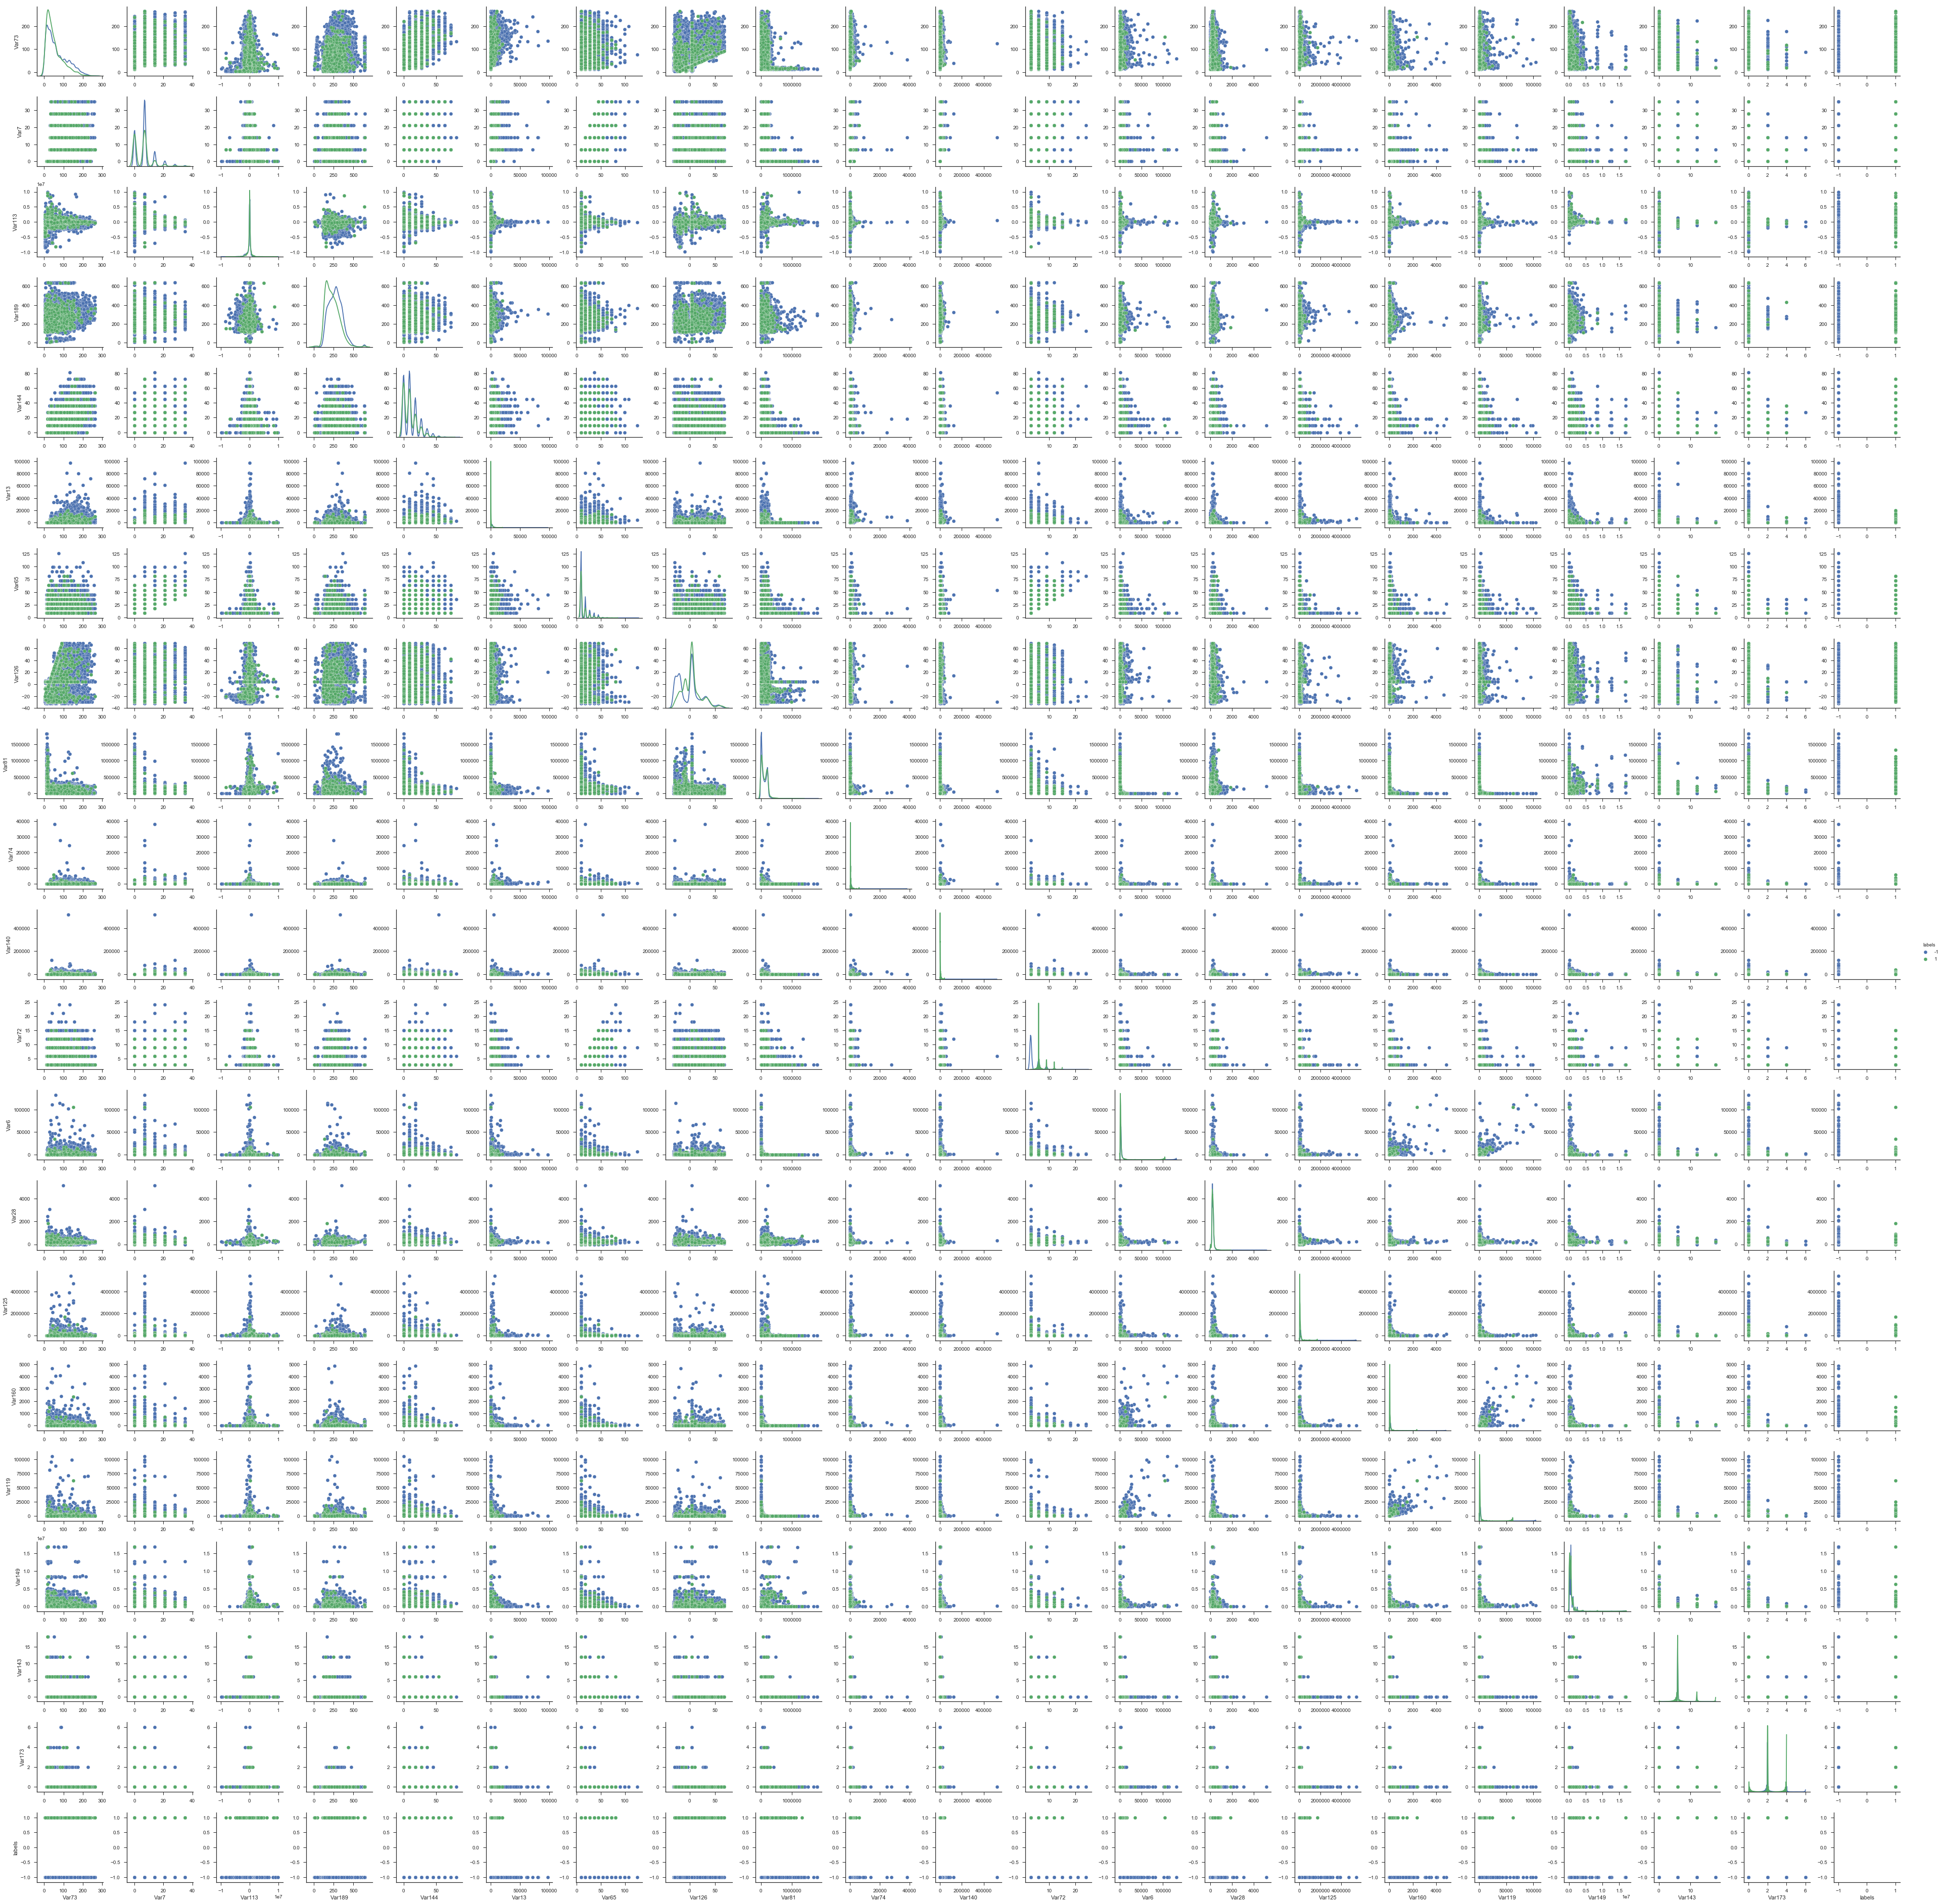

In [8]:
%matplotlib inline
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (15,20))
# ax = fig.gca()
# data.loc[:,topNumCorrs20].hist(ax = ax)
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data.loc[:,topNumCorrs20 + ['labels']], hue = 'labels', diag_kind="kde", dropna=True)

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


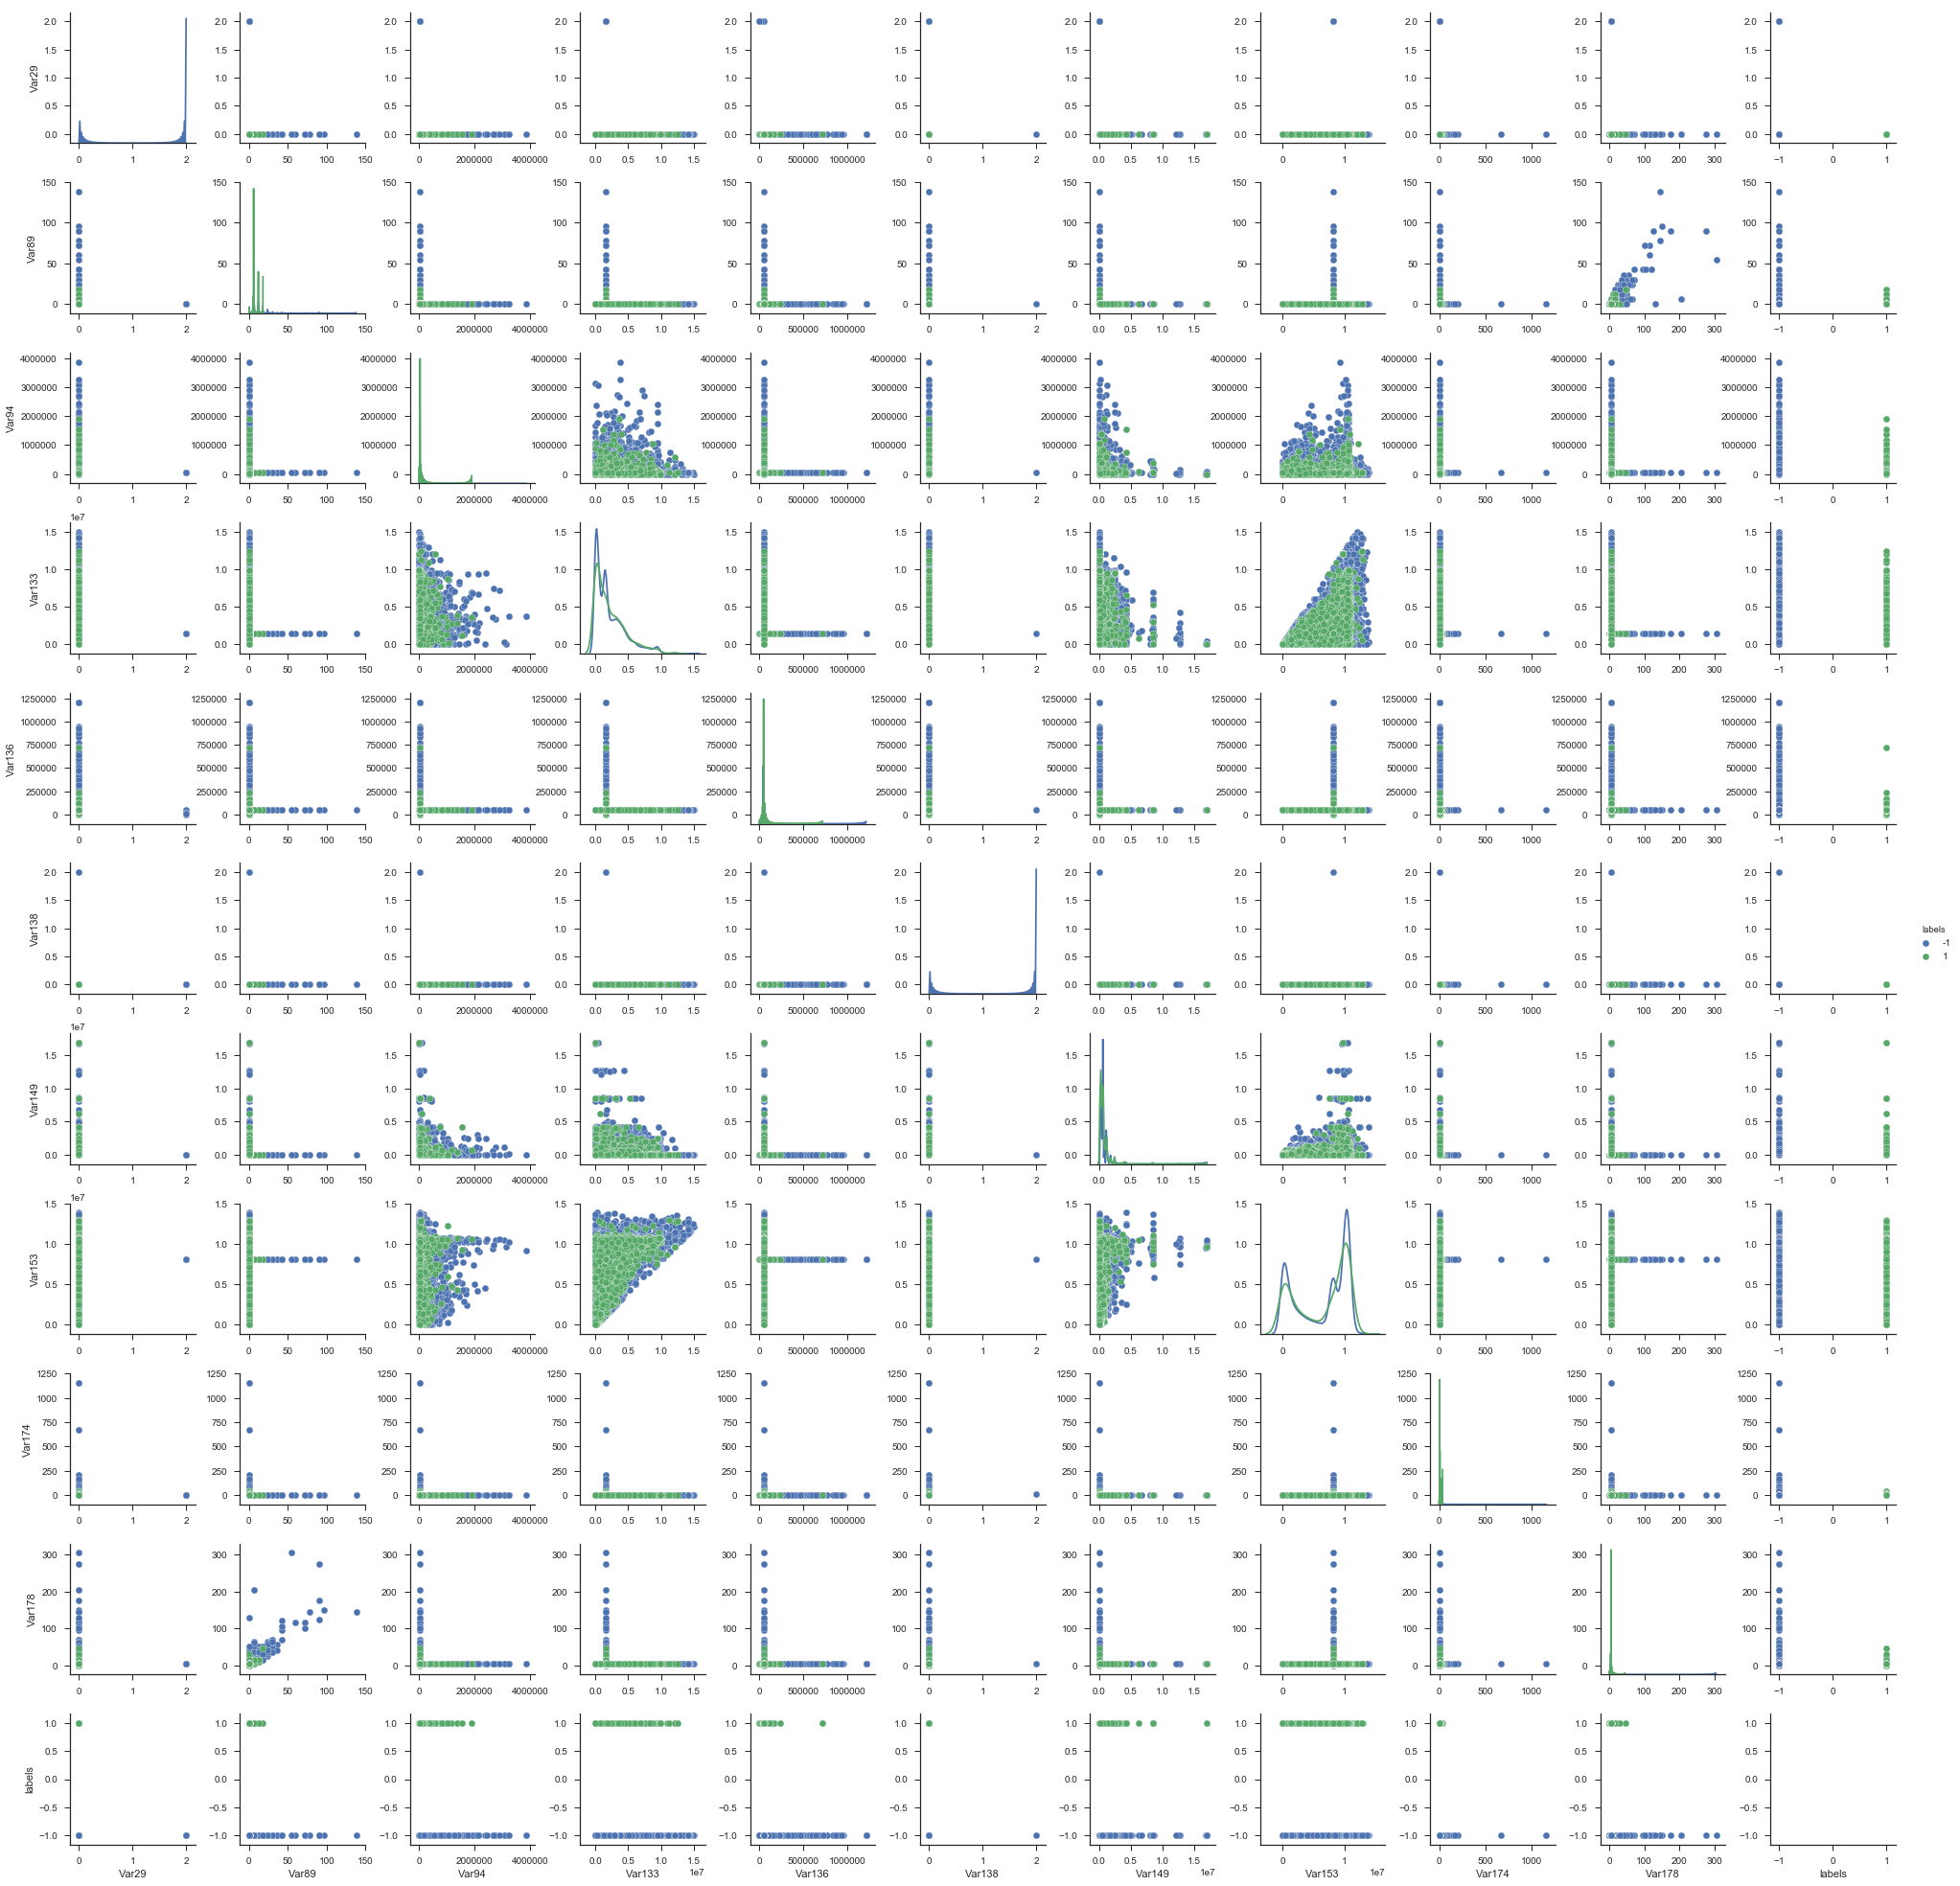

In [10]:
def f(x):
    return str(x)
vf = np.vectorize(f)

rand10 = list(np.random.randint(1, numericalVarCount,10))
rand10.sort()
rand10 = list(vf(rand10))
rand10 = ['Var' + d for d in rand10]

sns.set(style="ticks", color_codes=True)
sns.pairplot(data.loc[:,rand10 + ['labels']].fillna(data.loc[:,rand10 + ['labels']].median()), hue = 'labels', diag_kind="kde")

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [11]:
bottomNumCorrs10 = sorted_numCorrs[-10:]
bottomNumCorrs10

['Var96',
 'Var41',
 'Var4',
 'Var16',
 'Var58',
 'Var121',
 'Var146',
 'Var104',
 'Var105',
 'Var129']

E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


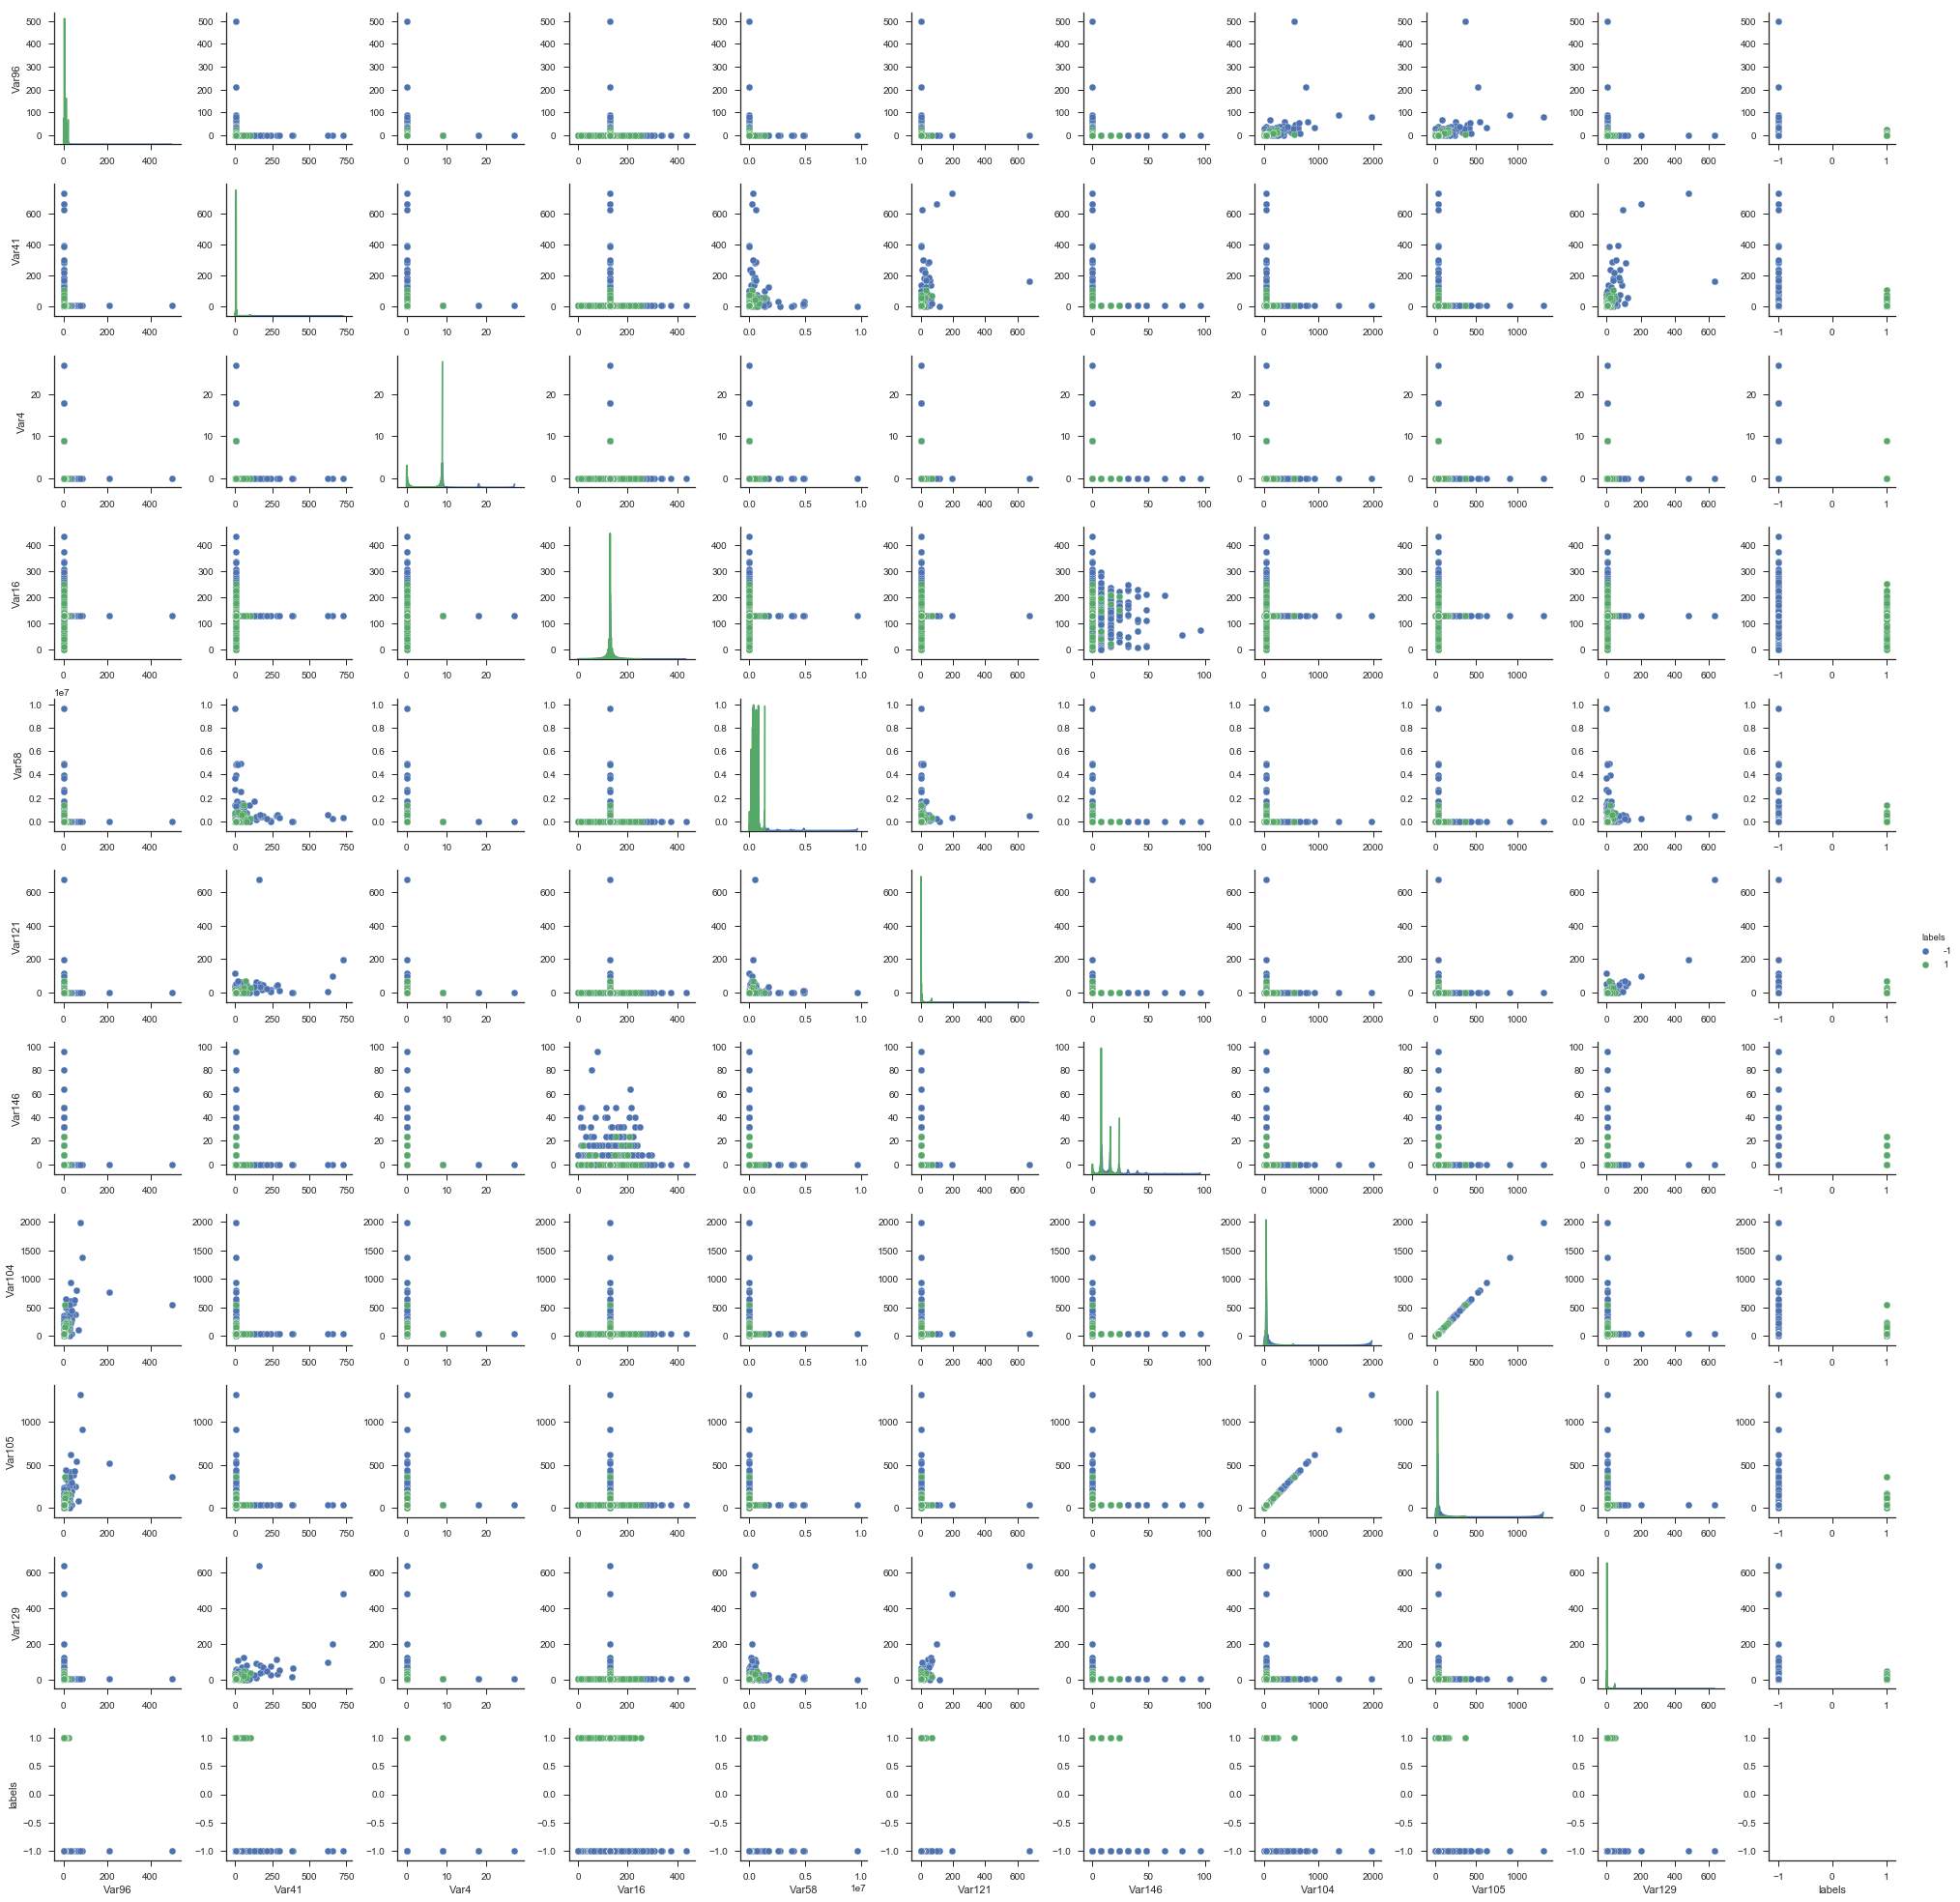

In [12]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data.loc[:,bottomNumCorrs20 + ['labels']].fillna(data.loc[:,bottomNumCorrs20 + ['labels']].median()) , hue = 'labels', diag_kind="kde")

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

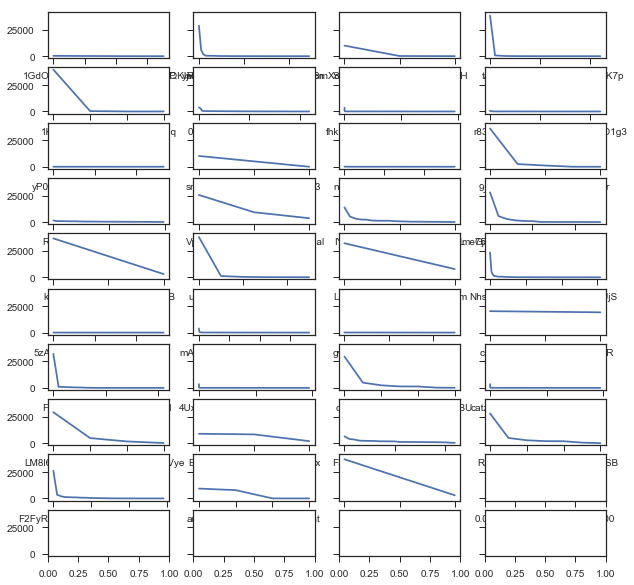

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 4, figsize=(10, 10), sharey=True)
s = 0
numericalVarCount = 190
categorialVarCount = 40
for i in range(numericalVarCount+1,data.shape[1]):
    if data[data.columns[i]].value_counts().shape[0] <2:
        continue
    data[data.columns[i]].value_counts().plot(ax=axes[s // 4, s % 4])
    s += 1

8\. Проанализируйте полученные результаты:

* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?

Выводы: Есть очень много переменных, с большим количеством значений 'NaN'. БОльшая часть данных принадлежит классу "-1", то есть бОльшая часть клиентов не собирается уходить. По графикам (особенно по графикам, построенным по признакам с высоким поэффициентом корреляции) видно, что целевая переменная плохо разделяется по любому одному признаку, но достаточно неплохо разделяется по некоторым парам признаков. Большинство признаков имеют распределение, далекое от нормального.

* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?

Наибольший вклад в модель окажут те переменные, у которых малая доля значений NaN, и при этом они позволяют хорошо разделять целевую переменную, хотя бы в паре с другой переменной, например, как можно видеть по графику, построенному по переменным с наибольшей корреляцией, хорошую разделяемость дают следующие пары переменных: (73, 125), (159,73), (73,13), (189, 126), (113, 13), (133,159) и так далее поэтому переменные из этих пар окажут наибольшее влияние на модель.

* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?

Наименьший вклад окажут переменные, у которых почти все значения NaN

* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Да, например, некоторые признаки ленейно зависят друг от друга (например 104 и 105), нужно будет удалить один из зависящих признаков, или как-то по другому решить эту проблему (регуляризация и т.п.), кроме того, у многих признаков очень мало значений,
с этим тоже нужно что-то делать.